!pip install lightgbm
!pip install xgboost

In [1]:
# 기본
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 경고가 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나이상 설정할 경우
from sklearn.model_selection import cross_validate

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 평가함수 - 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 평가함수 - 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류용
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀용
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 시간 측정을 위한모듈
import datetime
# 저장을 위한 모듈
import pickle

### 데이터를 읽어온다.

In [2]:
df1 = pd.read_csv('data/breast_cancer.csv')
df1

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.1866,0.2416,0.18600,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.4245,0.4504,0.24300,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,21.10,20.52,138.10,1384.0,0.09684,0.11750,0.15720,0.11550,0.1554,0.05661,...,32.07,168.20,2022.0,0.13680,0.3101,0.4399,0.22800,0.2268,0.07425,malignant
450,11.87,21.54,76.83,432.0,0.06613,0.10640,0.08777,0.02386,0.1349,0.06612,...,28.18,83.51,507.2,0.09457,0.3399,0.3218,0.08750,0.2305,0.09952,benign
451,19.59,25.00,127.70,1191.0,0.10320,0.09871,0.16550,0.09063,0.1663,0.05391,...,30.96,139.80,1421.0,0.15280,0.1845,0.3977,0.14660,0.2293,0.06091,malignant
452,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,0.06104,...,37.88,85.07,523.7,0.12080,0.1856,0.1811,0.07116,0.2447,0.08194,benign


In [3]:
# 데이터 프레임 정보 확인
# Dtype에서 Object(문자열)인 컬럼을 확인한다.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              454 non-null    float64
 1   mean texture             454 non-null    float64
 2   mean perimeter           454 non-null    float64
 3   mean area                454 non-null    float64
 4   mean smoothness          454 non-null    float64
 5   mean compactness         454 non-null    float64
 6   mean concavity           454 non-null    float64
 7   mean concave points      454 non-null    float64
 8   mean symmetry            454 non-null    float64
 9   mean fractal dimension   454 non-null    float64
 10  radius error             454 non-null    float64
 11  texture error            454 non-null    float64
 12  perimeter error          454 non-null    float64
 13  area error               454 non-null    float64
 14  smoothness error         4

In [4]:
# 결측치 확인
df1.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [5]:
# 범위형 데이터에 대한 이상치
# 범위형 컬럼만 모아서 최대와 최소를 확인한다.
df1[['mean radius', 'mean area']].agg(['min', 'max'])

,mean radius,mean area
min,6.981,143.5
max,28.110,2499.0


In [6]:
# 카테고리 데이터
# 결측치를 제외한 데이터의 종류를 파악할 수 있다.
df1['target'].value_counts().index

Index(['benign', 'malignant'], dtype='object')

In [7]:
# 결측치를 포함한 데이터의 종류를 파악할 수 있다.
df1['target'].unique()

array(['malignant', 'benign'], dtype=object)

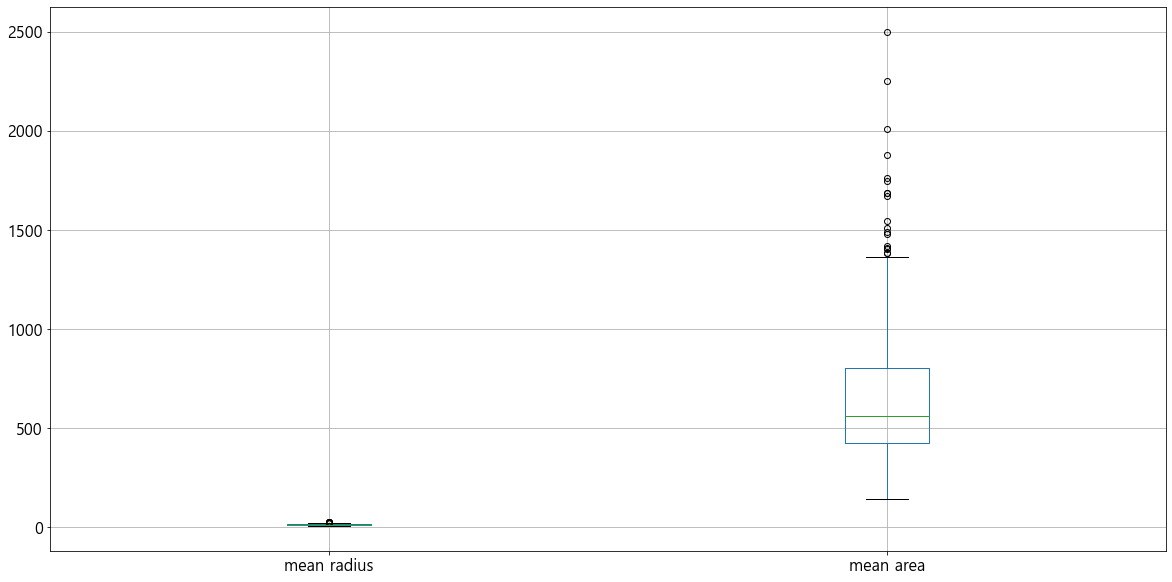

In [8]:
# 범위형 데이터에 대한 극단치를 확인한다.
# 동그라미가 극단치에 해당한다.
df1[['mean radius', 'mean area']].boxplot()
plt.show()

In [9]:
# 입력과 결과로 나눈다.
X = df1.drop('target', axis=1)
y = df1['target']

display(X)
display(y)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.12380,0.1866,0.2416,0.18600,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.14440,0.4245,0.4504,0.24300,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,21.10,20.52,138.10,1384.0,0.09684,0.11750,0.15720,0.11550,0.1554,0.05661,...,25.68,32.07,168.20,2022.0,0.13680,0.3101,0.4399,0.22800,0.2268,0.07425
450,11.87,21.54,76.83,432.0,0.06613,0.10640,0.08777,0.02386,0.1349,0.06612,...,12.79,28.18,83.51,507.2,0.09457,0.3399,0.3218,0.08750,0.2305,0.09952
451,19.59,25.00,127.70,1191.0,0.10320,0.09871,0.16550,0.09063,0.1663,0.05391,...,21.44,30.96,139.80,1421.0,0.15280,0.1845,0.3977,0.14660,0.2293,0.06091
452,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,0.06104,...,13.09,37.88,85.07,523.7,0.12080,0.1856,0.1811,0.07116,0.2447,0.08194


0      malignant
1      malignant
2      malignant
3      malignant
4      malignant
         ...    
449    malignant
450       benign
451    malignant
452       benign
453       benign
Name: target, Length: 454, dtype: object

In [10]:
# 문자열 컬럼 값을 숫자로 변환한다.
encoder1 = LabelEncoder()
encoder1.fit(y)
y = encoder1.transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [11]:
# 표준화
scaler1 = StandardScaler()
scaler1.fit(X)
X = scaler1.transform(X)
X

array([[ 1.0716471 , -2.11021126,  1.24691885, ...,  2.21627442,
         2.57629265,  1.89296305],
       [ 1.80872514, -0.29975355,  1.665741  , ...,  1.02843583,
        -0.29491256,  0.27048275],
       [ 1.55731868,  0.55280299,  1.54548514, ...,  1.88116631,
         1.04374227,  0.19229093],
       ...,
       [ 1.52874976,  1.47150615,  1.4501098 , ...,  0.43900458,
        -1.00379467, -1.25588676],
       [-0.63963097,  2.26281581, -0.66183197, ..., -0.68959168,
        -0.76491536, -0.11396037],
       [ 0.0831626 , -1.22825622,  0.04684827, ..., -0.15491471,
        -0.51828023, -0.32247189]])

In [12]:
# 학습용과 검증용으로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=1)

### 기본 모델 사용하기

In [13]:
# KFold 생성
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [14]:
# 사용할 모델들
model1 = KNeighborsClassifier()
model2 = LogisticRegression(random_state=1)
model3 = SVC(random_state=1, probability=True)
model4 = DecisionTreeClassifier(random_state=1)
model5 = RandomForestClassifier(random_state=1)
model6 = AdaBoostClassifier(random_state=1)
model7 = GradientBoostingClassifier(random_state=1)
model8 = LGBMClassifier(random_state=1)
model9 = XGBClassifier(random_state=1, silent=True, verbosity=0)

model_list1= [
    ('m1', KNeighborsClassifier()),
    ('m2', LogisticRegression(random_state=1)),
    ('m3', SVC(random_state=1, probability=True)),
    ('m4', DecisionTreeClassifier(random_state=1)),
    ('m5', RandomForestClassifier(random_state=1)),
    ('m6', AdaBoostClassifier(random_state=1)),
    ('m7', GradientBoostingClassifier(random_state=1)),
    ('m8', LGBMClassifier(random_state=1)),
    ('m9', XGBClassifier(random_state=1, silent=True, verbosity=0))
]
# 배깅 운영방식은 위에서 사용한 앙상블, 부스팅들이 사용하고 있다.
# 보팅 운영방식도 테스트해보기 위해 사용한다.
# 매개변수 voting은 투표방식을 설정한다 (hard, soft)
model10 = VotingClassifier(estimators=model_list1, voting='hard')

model_list2 = [
    ('m10', KNeighborsClassifier()),
    ('m20', LogisticRegression(random_state=1)),
    ('m30', SVC(random_state=1, probability=True)),
    ('m40', DecisionTreeClassifier(random_state=1)),
    ('m50', RandomForestClassifier(random_state=1)),
    ('m60', AdaBoostClassifier(random_state=1)),
    ('m70', GradientBoostingClassifier(random_state=1)),
    ('m80', LGBMClassifier(random_state=1)),
    ('m90', XGBClassifier(random_state=1, silent=True, verbosity=0))
]

model11 = VotingClassifier(estimators=model_list2, voting='soft')

In [15]:
# 성능 값을 담을 리스트
score_list = []
# 학습 모델의 이름을 담을 리스트
model_name_list = []
# 최적으로 튜닝된 학습 모델을 담을 리스트
best_model_list = []

In [16]:
# 교차 검증을 수행할 학습 모델 리스트
check_list = [
    model1, model2, model3, model4, model5, model6, model7,
    model8, model9, model10, model11
]
# 모델의 이름
check_name_list = [
    'KNN (Basic)', 'LogisticRegression (Basic)', 'SVM (Basic)',
    'DecisionTree (Basic)', 'RandomForest (Basic)', 'AdaBoost (Basic)',
    'GradientBoost (Basic)', 'LGBM (Basic)', 'XGBoost (Basic)',
    'Voting (Hard) (Basic)', 'Voting (Soft) (Basic)'
]

In [1]:
# 교차 검증
for idx, ml in enumerate(check_list) :
    score = cross_val_score(ml, X_train, y_train, scoring='f1', cv=kfold)
    
    # 현재 알고리즘의 이름과 평가 점수의 평균을 출력한다.
    print(f'{check_name_list[idx]} : {score.mean()}')
    
    # 현재 알고리즘의 이름과 평가 점수의 평균을 리스트에 담는다.
    score_list.append(score.mean())
    model_name_list.append(check_name_list[idx])
    best_model_list.append(ml)

NameError: name 'check_list' is not defined

### 하이퍼 파라미터 튜닝

In [18]:
# 튜닝하기 위해 사용할 파라미터 후보 값
parameter_list = [
    # KNN
    {
        # 확인할 주변 이웃의 개수
        'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    },
    # LogisticRegrssion
    {
        # 규제의 종류
        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
        # 규제의 강도
        'C' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
    },
    # SVM (규제의 종류를 l2만 사용한다.)
    {
        # 규제의 강도
        'C' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
    },
    # DecisionTree
    {
        # 생성될 최대 질문 깊이. None은 무한대
        'max_depth' :[None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    },
    # RandomForest
    {
        # 사용할 학습 모델의 개수
        'n_estimators' : [50, 100, 150, 200, 250, 300]
    },
    # AdaBoost
    {
        # 학습률
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000],
        # 사용할 학습 모델의 개수
        'n_estimators' : [50, 100, 150, 200, 250, 300]
    },
    # GradientBoost
    {
        # 학습률
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000],
        # 사용할 학습 모델의 개수
        'n_estimators' : [50, 100, 150, 200, 250, 300]
    },
    # LGBM
    {
        # 학습률
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000],
        # 사용할 학습 모델의 개수
        'n_estimators' : [50, 100, 150, 200, 250, 300]
    },
    # XGBoost
    {
        # 내부에서 사용할 알고리즘 종류(gbtree : 결정트리, gblinear : 선형모델)
        'booster' : ['gbtree', 'gblinear'],
        # 학습률
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000],
        # 사용할 학습 모델의 개수
        'n_estimators' : [50, 100, 150, 200, 250, 300]
    },
]

In [19]:
# 사용할 모델들
model1 = KNeighborsClassifier()
model2 = LogisticRegression(random_state=1)
model3 = SVC(random_state=1, probability=True)
model4 = DecisionTreeClassifier(random_state=1)
model5 = RandomForestClassifier(random_state=1)
model6 = AdaBoostClassifier(random_state=1)
model7 = GradientBoostingClassifier(random_state=1)
model8 = LGBMClassifier(random_state=1)
model9 = XGBClassifier(random_state=1, silent=True, verbosity=0)


In [20]:
# 튜닝을 수행할 학습 모델 리스트
check_list = [
    model1, model2, model3, model4, model5, model6, model7,
    model8, model9
]
# 모델의 이름
check_name_list = [
    'KNN (Tuning)', 'LogisticRegression (Tuning)', 'SVM (Tuning)',
    'DecisionTree (Tuning)', 'RandomForest (Tuning)', 'AdaBoost (Tuning)',
    'GradientBoost (Tuning)', 'LGBM (Tuning)', 'XGBoost (Tuning)'
]

In [21]:
# 하이퍼 파라미터 튜닝
for idx, ml in enumerate(check_list) :
    grid1 = GridSearchCV(ml, param_grid=parameter_list[idx], scoring='f1', cv=kfold)
    grid1.fit(X_train, y_train)
    
    # 현재 알고리즘의 이름과 평가 점수의 평균을 리스트에 담는다.
    score_list.append(grid1.best_score_)
    model_name_list.append(check_name_list[idx])
    best_model_list.append(grid1.best_estimator_)
    
    print(f'{check_name_list[idx]} : {grid1.best_score_}')
    print(grid1.best_params_)

KNN (Tuning) : 0.9525779291613794
{'n_neighbors': 7}
LogisticRegression (Tuning) : 0.9723017241379311
{'C': 0.1, 'penalty': 'l2'}
SVM (Tuning) : 0.9655636645962733
{'C': 10}
DecisionTree (Tuning) : 0.9259239859841836
{'max_depth': None}
RandomForest (Tuning) : 0.942474358974359
{'n_estimators': 50}
AdaBoost (Tuning) : 0.969210815047022
{'learning_rate': 1, 'n_estimators': 300}
GradientBoost (Tuning) : 0.9444068986568986
{'learning_rate': 0.1, 'n_estimators': 150}
LGBM (Tuning) : 0.9572490925589838
{'learning_rate': 1, 'n_estimators': 50}
XGBoost (Tuning) : 0.9701529304029304
{'booster': 'gblinear', 'learning_rate': 0.01, 'n_estimators': 100}


In [22]:
model_list1= [
    ('m1', best_model_list[11]),
    ('m2', best_model_list[12]),
    ('m3', best_model_list[13]),
    ('m4', best_model_list[14]),
    ('m5', best_model_list[15]),
    ('m6', best_model_list[16]),
    ('m7', best_model_list[17]),
    ('m8', best_model_list[18]),
    ('m9', best_model_list[19])
]
# 배깅 운영방식은 위에서 사용한 앙상블, 부스팅들이 사용하고 있다.
# 보팅 운영방식도 테스트해보기 위해 사용한다.
# 매개변수 voting은 투표방식을 설정한다 (hard, soft)
model10 = VotingClassifier(estimators=model_list1, voting='hard')

model_list2 = [
    ('m10', best_model_list[11]),
    ('m20', best_model_list[12]),
    ('m30', best_model_list[13]),
    ('m40', best_model_list[14]),
    ('m50', best_model_list[15]),
    ('m60', best_model_list[16]),
    ('m70', best_model_list[17]),
    ('m80', best_model_list[18]),
    ('m90', best_model_list[19])
]

model11 = VotingClassifier(estimators=model_list2, voting='soft')

In [23]:
# 튜닝된 모델로 구성된 보팅 모델들을 교차 검증한다.
score1 = cross_val_score(model10, X_train, y_train, scoring='f1', cv=kfold)
score2 = cross_val_score(model11, X_train, y_train, scoring='f1', cv=kfold)

score_list.append(score1.mean())
score_list.append(score2.mean())

model_name_list.append('Voting (Hard) (Tuning)')
model_name_list.append('Voting (Soft) (Tuning)')

best_model_list.append(model10)
best_model_list.append(model11)

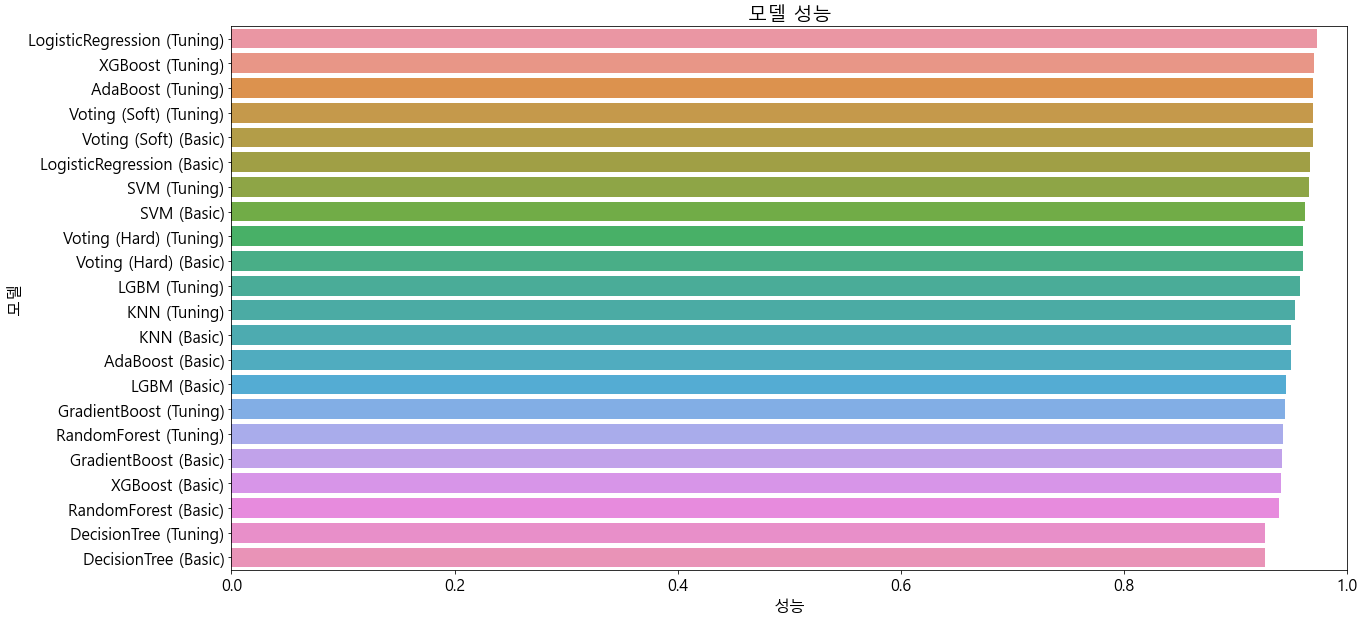

In [24]:
# 결과를 시각화한다.
d1 = {
    'model_name' : model_name_list,
    'score' : score_list
}

result_df = pd.DataFrame(d1)
result_df.sort_values(by='score', ascending=False, inplace=True)

sns.barplot(data=result_df, x='score', y='model_name')
plt.title('모델 성능')
plt.xlabel('성능')
plt.ylabel('모델')
plt.xlim(0, 1)
plt.show()

In [25]:
# 각 모델로 부터 검증 데이터에 대한 평가를 실시한다.
# 전체 모델을 X_train으로 학습을 진행한다.
for ml in best_model_list :
    ml.fit(X_train, y_train)

In [26]:
# 검증 데이터를 통해 예측 결과를 가져온다.
predict_list = []

for ml in best_model_list :
    pred = ml.predict(X_test)
    predict_list.append(pred)

In [27]:
# 정확도를 측정해본다.
accuray_list = []

for pred in predict_list :
    r1 = accuracy_score(pred, y_test)
    accuray_list.append(r1)

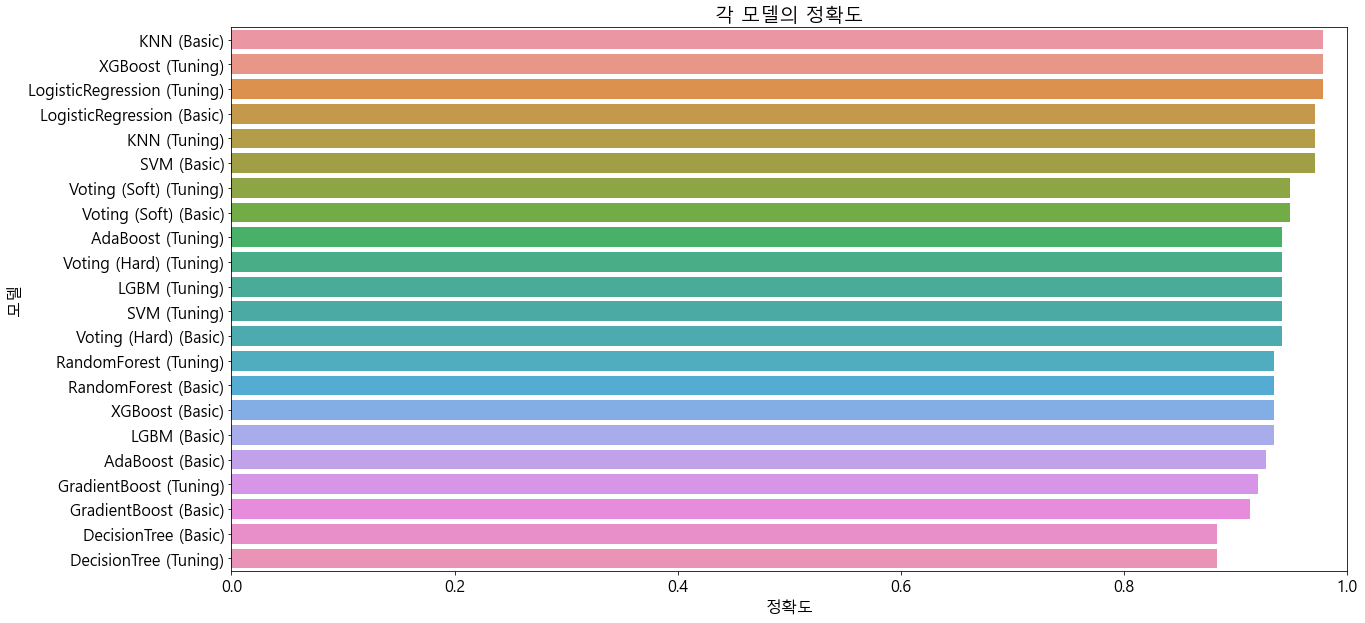

In [28]:
# 정확도를 시각화한다.
d100 = {
    'model_name' : model_name_list,
    'accuracy' : accuray_list
}

df100 = pd.DataFrame(d100)
df100.sort_values(by='accuracy', ascending=False, inplace=True)

sns.barplot(data=df100, x='accuracy', y='model_name')
plt.title('각 모델의 정확도')
plt.xlabel('정확도')
plt.ylabel('모델')
plt.xlim(0, 1)
plt.show()

In [30]:
# 각 학습 모델별 검증 데이터에 대한 예측 확률 값을 가져온다.
proba_list = []

for idx, ml in enumerate(best_model_list) :
    # Hard Voting은 확률 값을 구할 수 없기 때문에 제외한다.
    if idx == 9 or idx == 20 :
        proba_list.append(None)
        continue
    
    proba = ml.predict_proba(X_test)
    proba_list.append(proba)

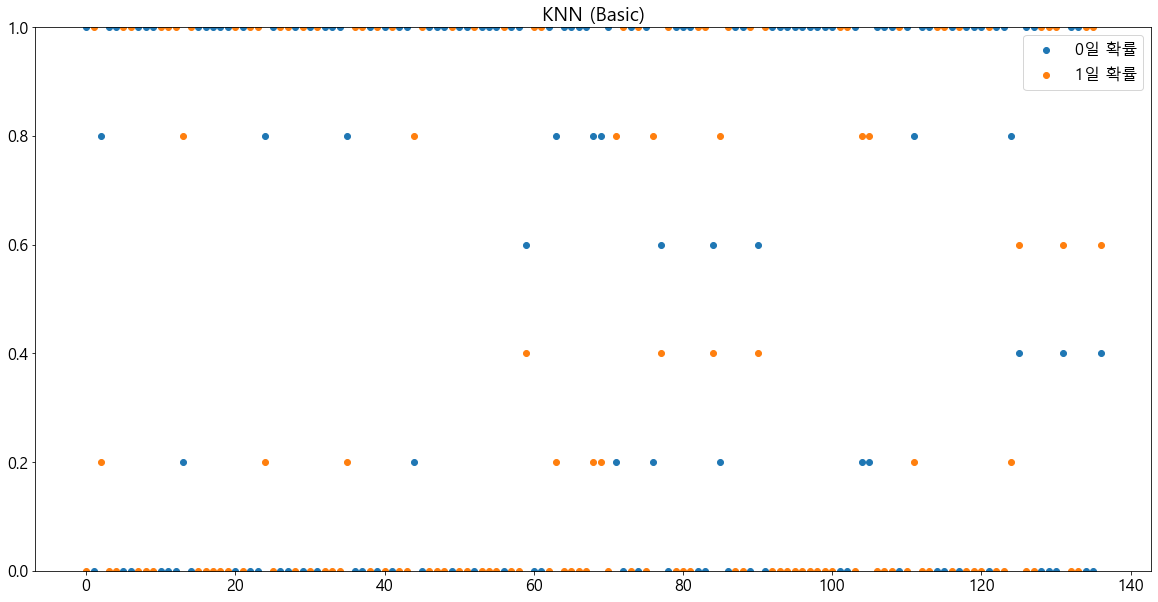

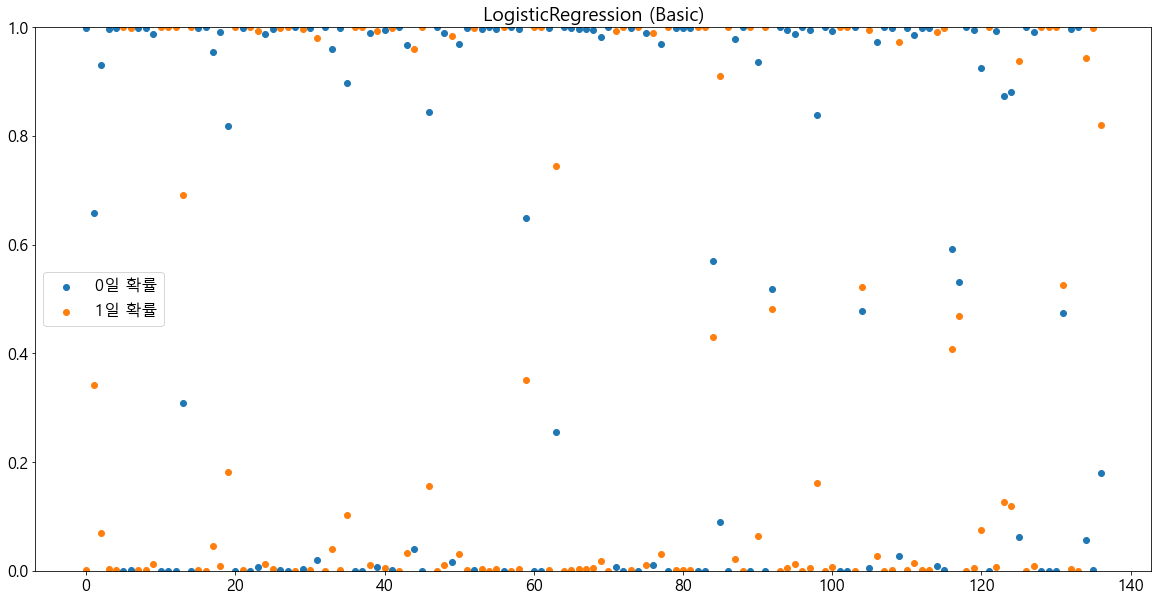

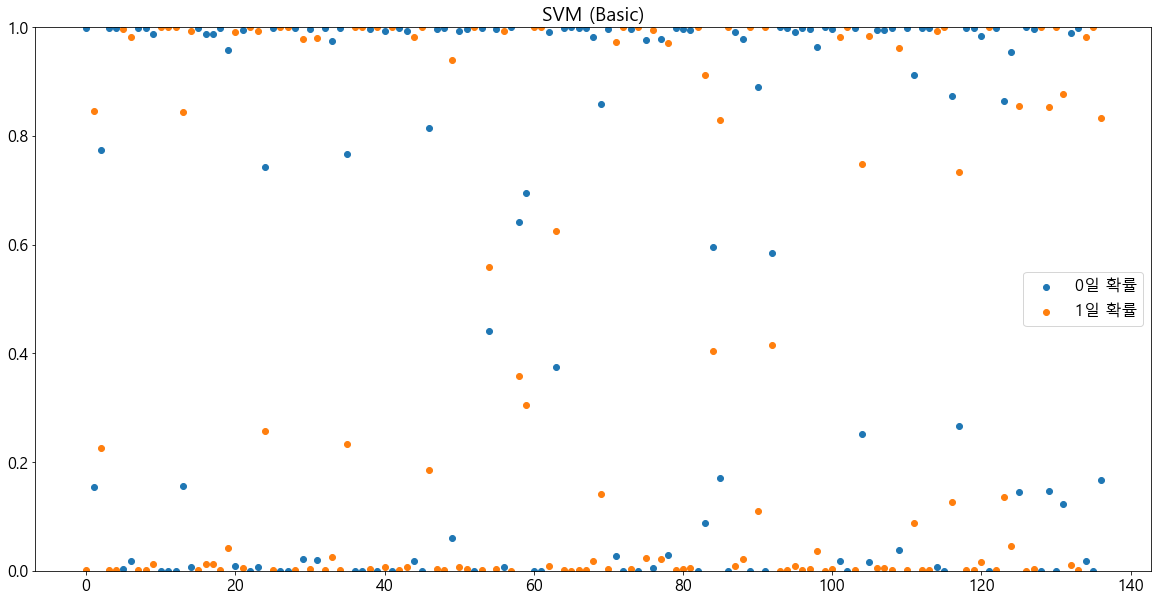

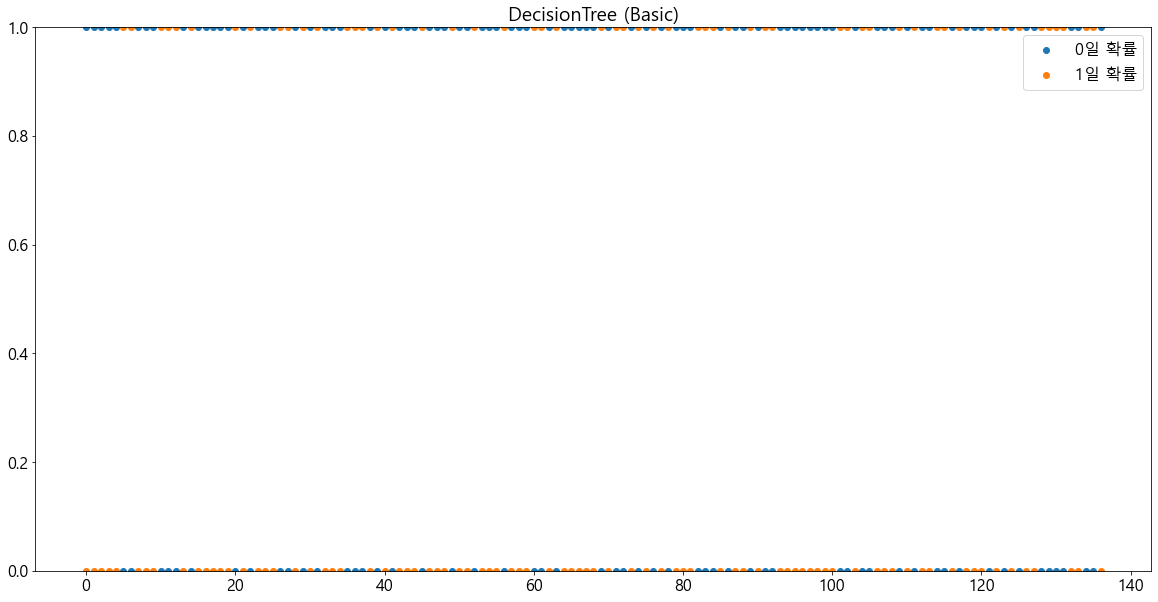

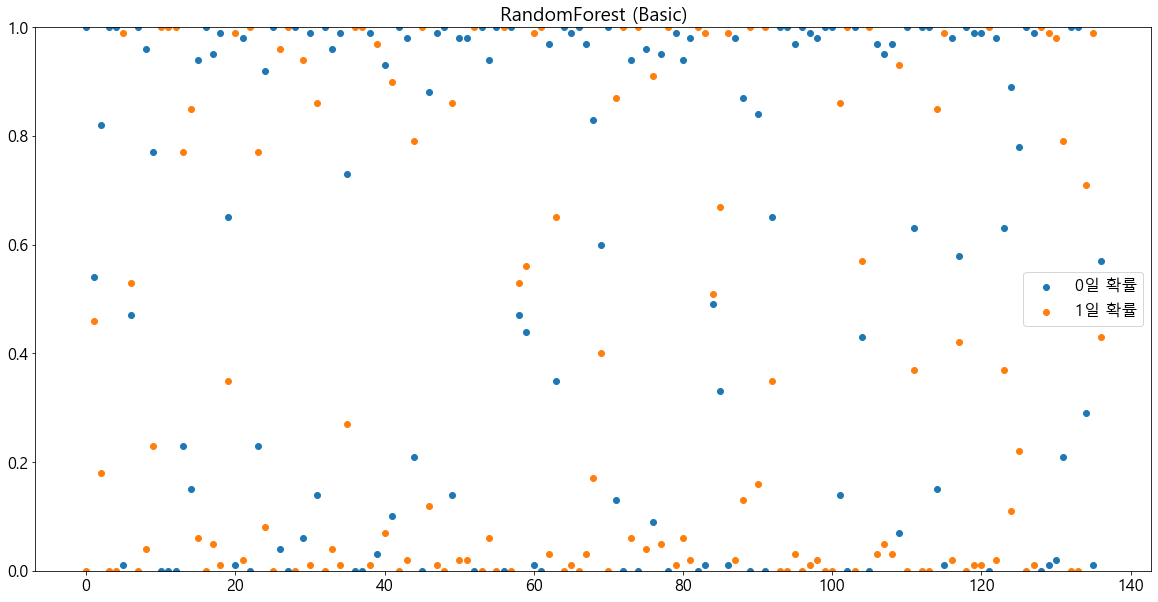

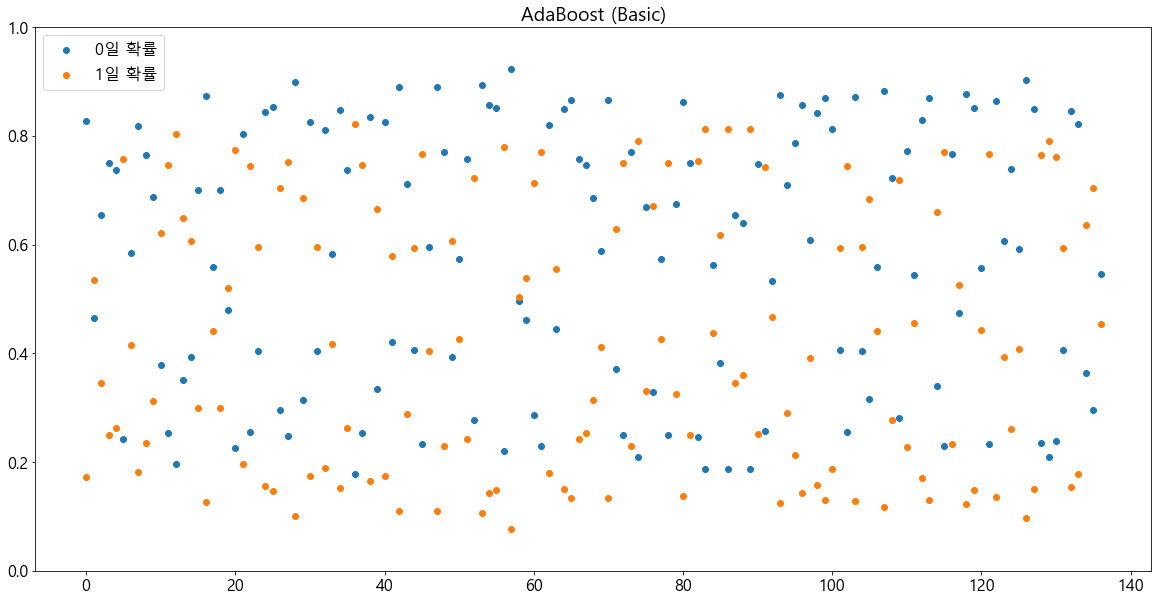

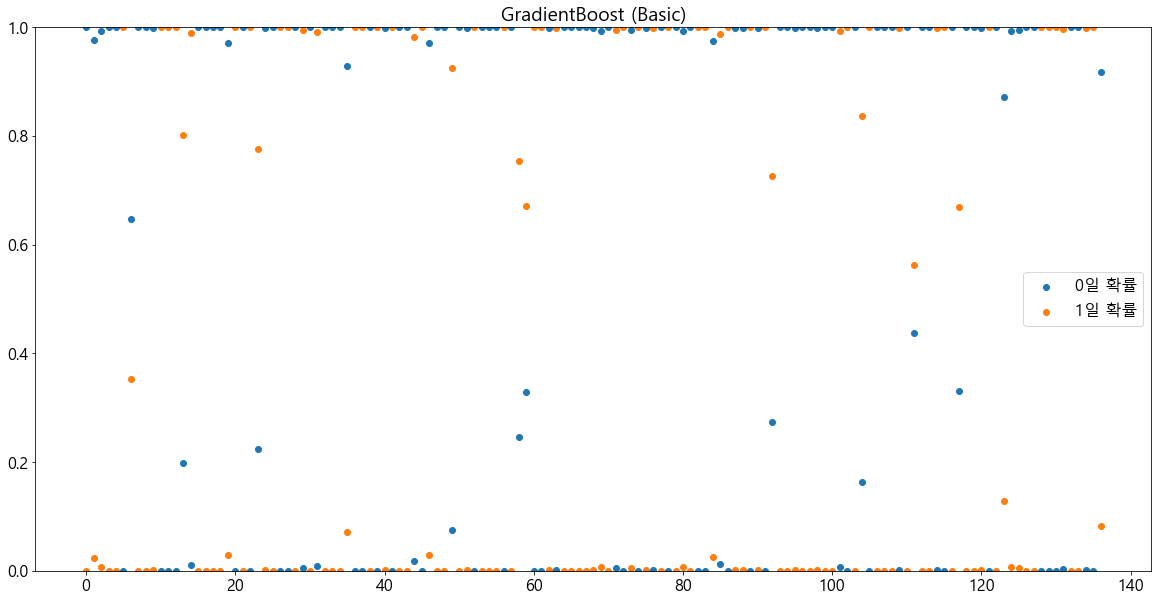

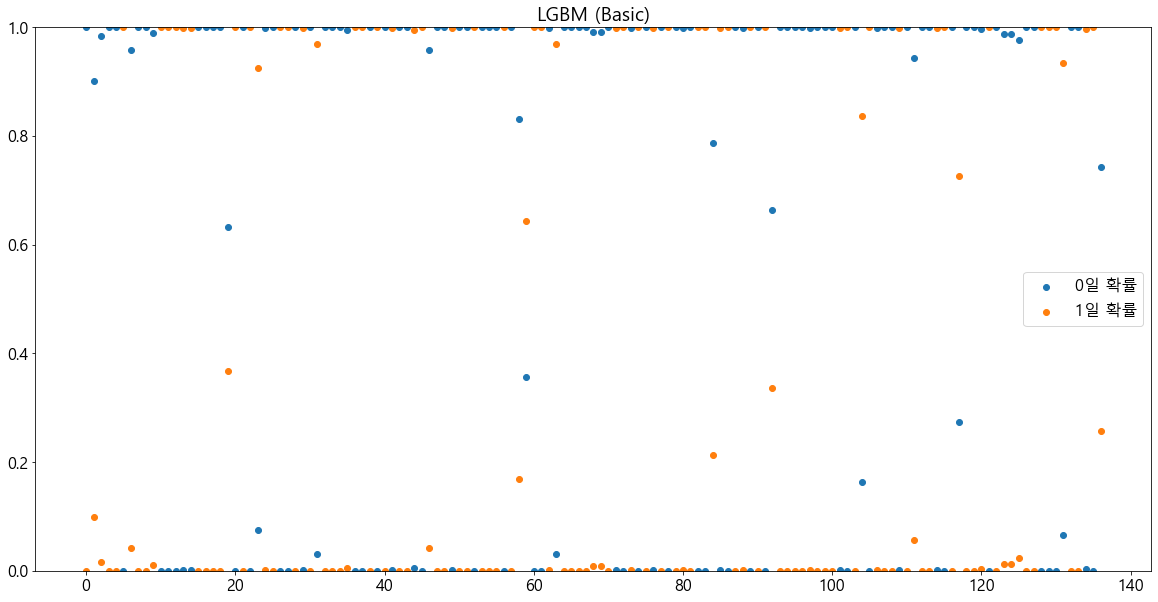

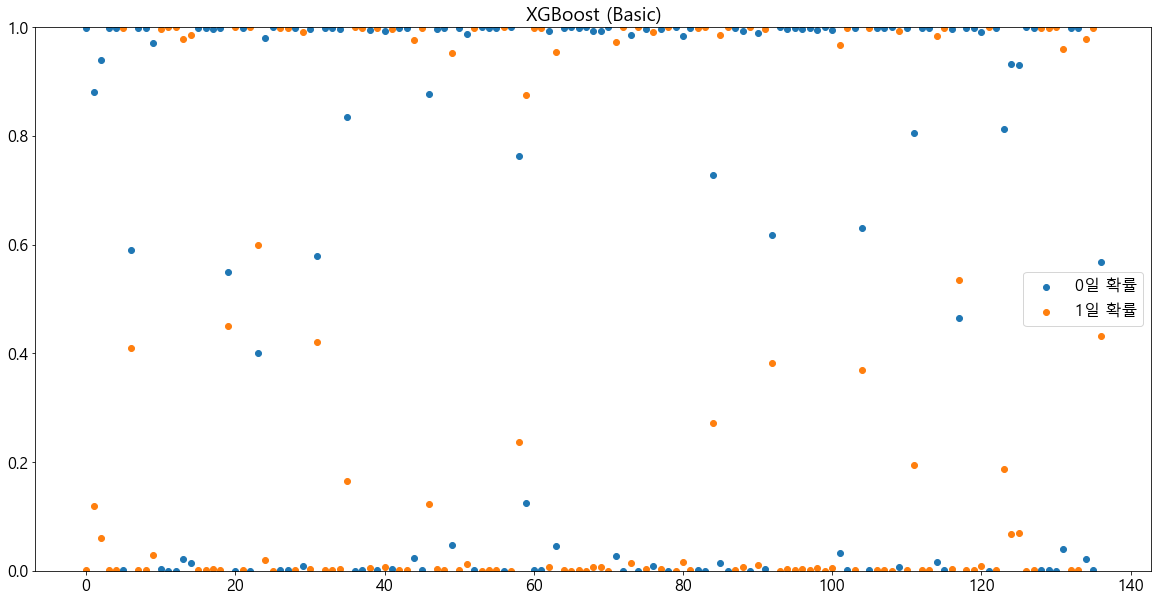

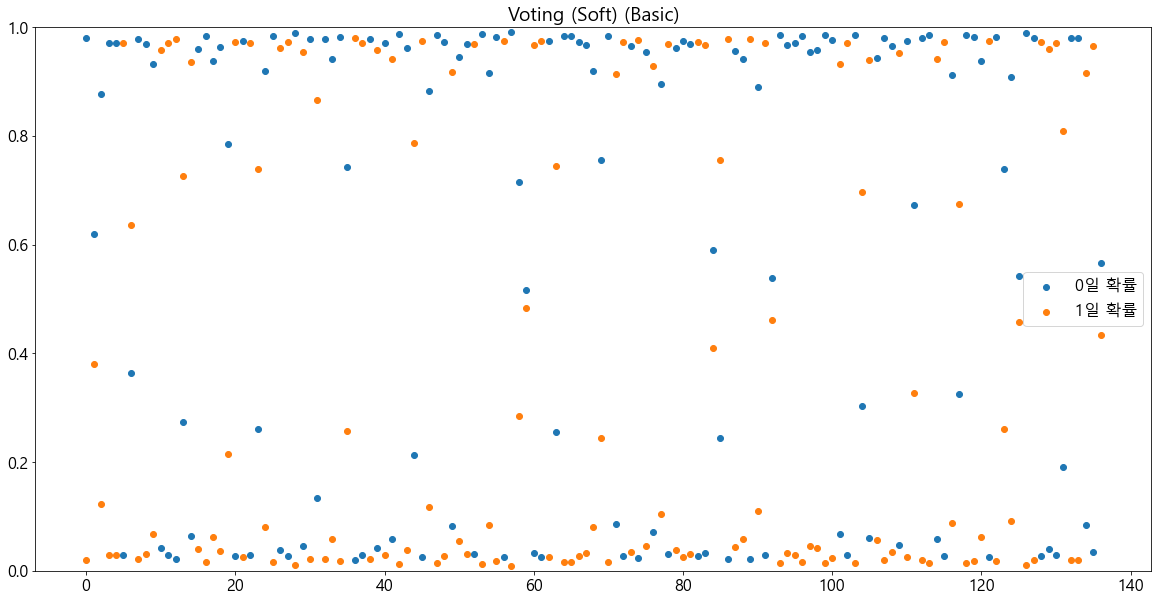

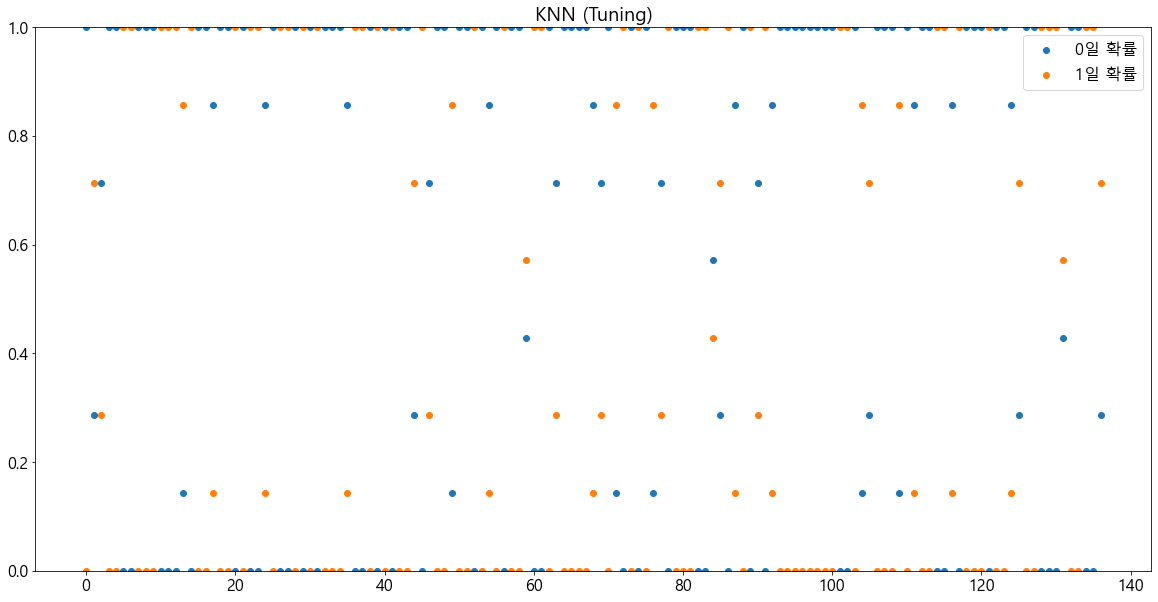

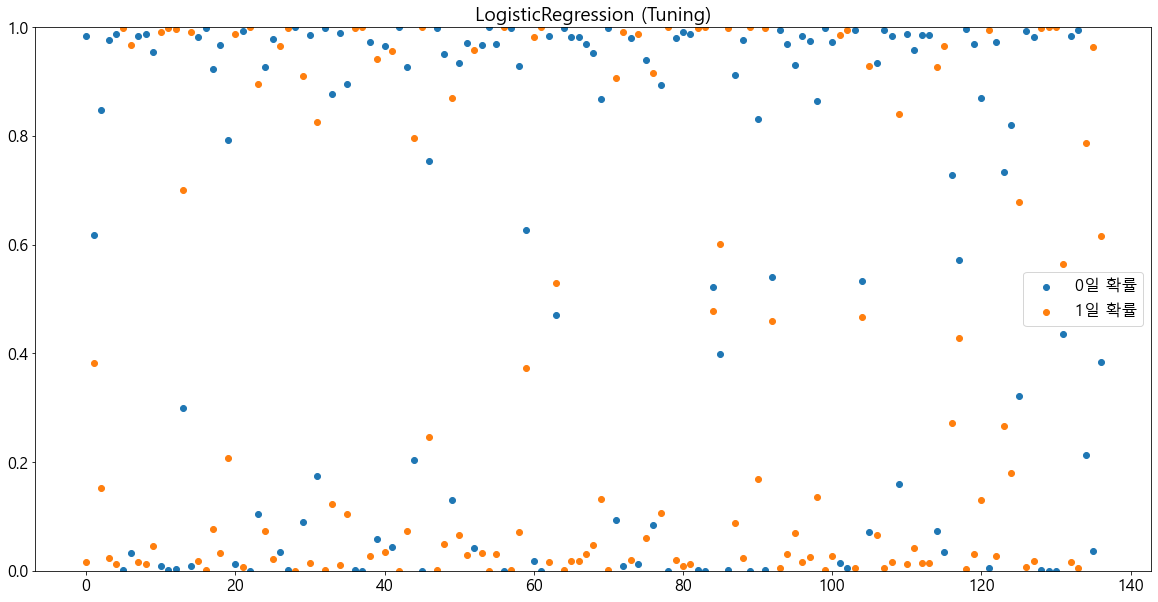

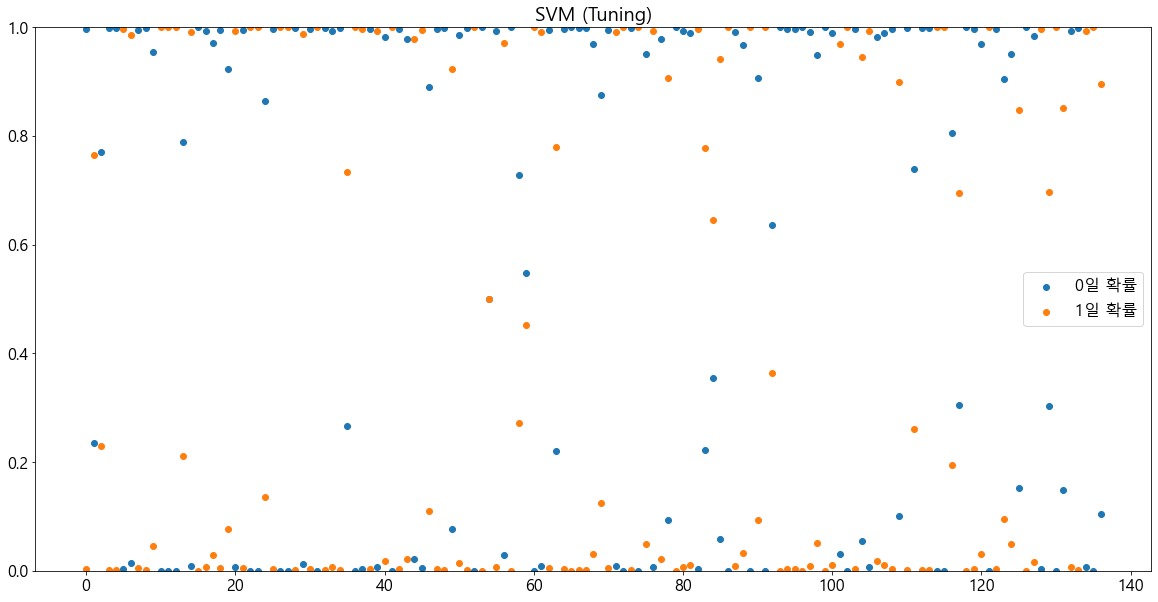

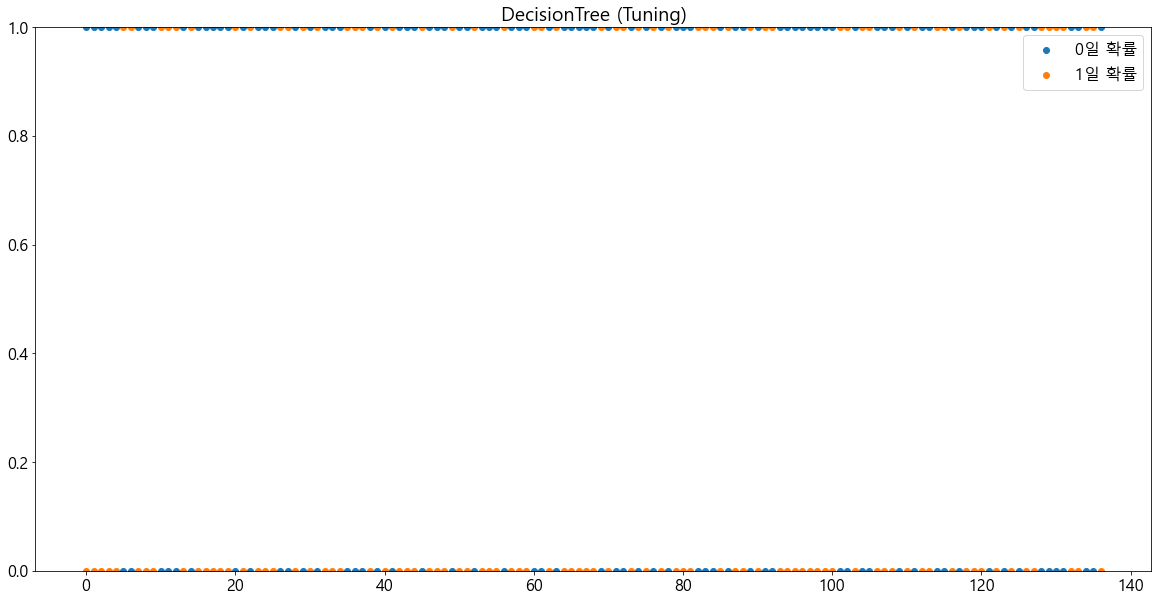

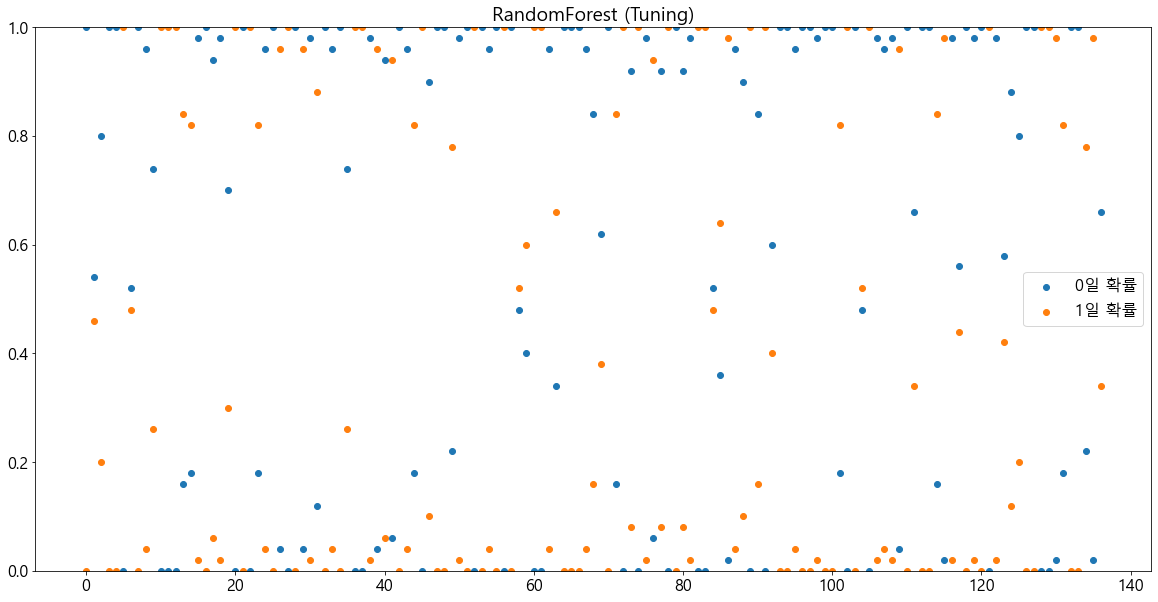

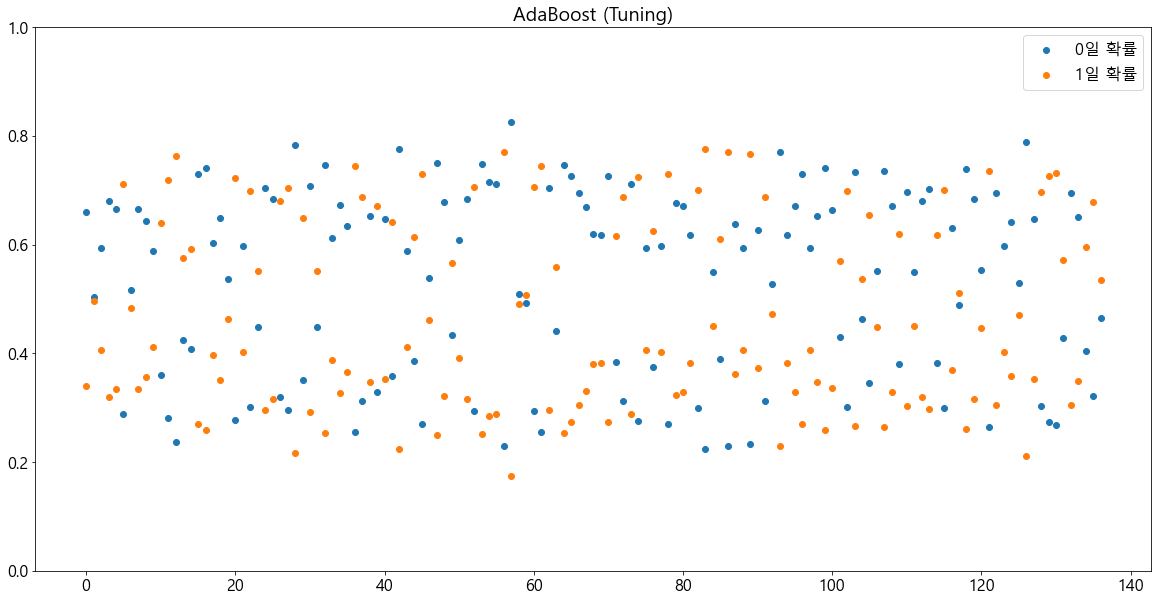

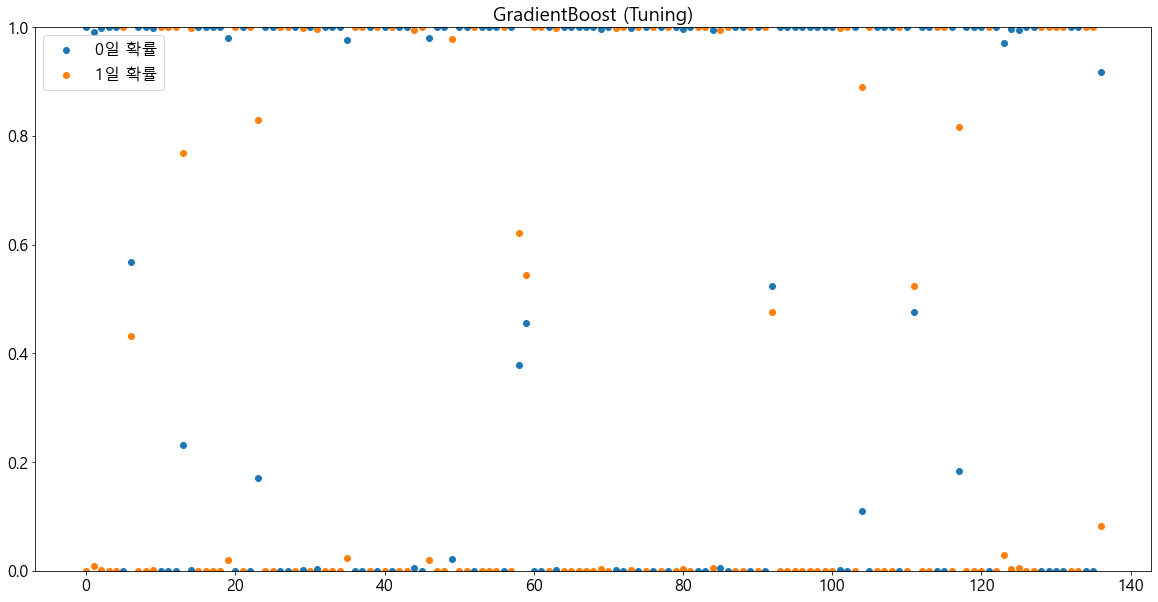

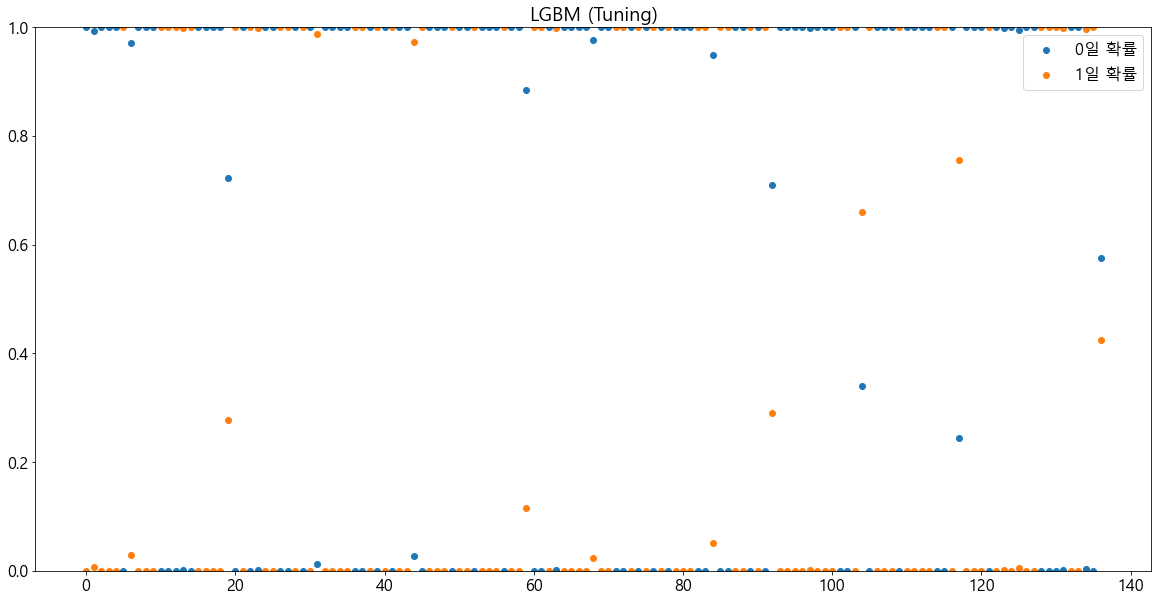

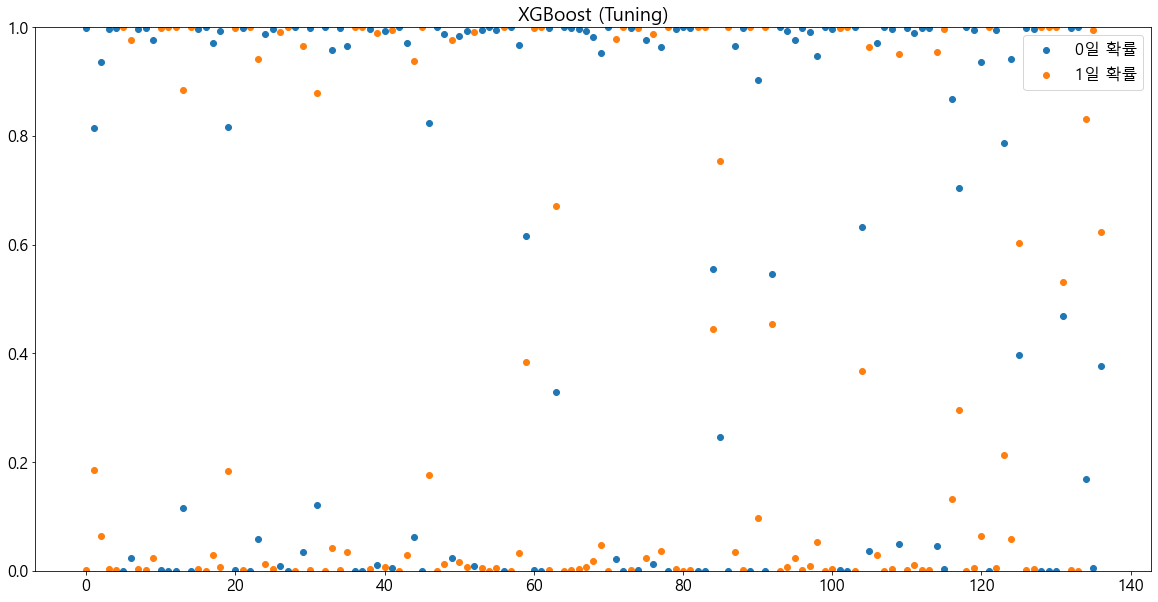

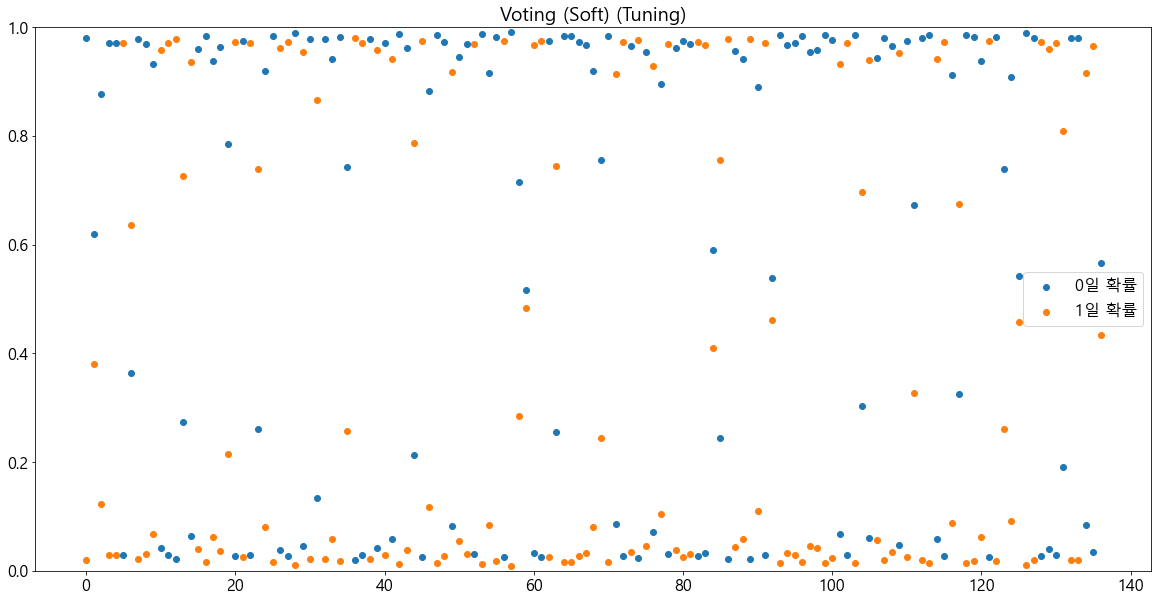

In [31]:
# 시각화 한다.
for idx, proba in enumerate(proba_list) :
    # hardVoting 은 제외(0...)
    if proba is None :
        continue
        
    # 0일 확률 값을 추출한다.
    a10 = proba[:, 0]
    # 1일 확률 값을 추출한다.
    a20 = proba[:, 1]
    
    plt.scatter(list(range(len(a10))), a10, label='0일 확률')
    plt.scatter(list(range(len(a20))), a20, label='1일 확률')
    plt.ylim(0, 1)
    plt.legend()
    plt.title(model_name_list[idx])
    plt.show()

1. f1 수치가 높은 모델들을 선정한다.
2. 1번에서 선정된 모델 중에서 정확도가 높은 모델들을 선정한다.
3. 2번에서 선정된 모델 중에서 확률 그래프상 0.2~0.8 구간의 점이 적은 모델을 선정한다.
4. 3번 모델에서 예측 속도가 가장 빠른 모델을 최종 선정한다.

In [32]:
# 모든 모델을 통해 예측 시간을 가져온다.
time_list=[]

for ml in best_model_list:
    # 시작 시간
    a1 = datetime.datetime.now()
    
    # 예측
    pred = ml.predict(X_test)
    
    # 종료 시간
    a2 = datetime.datetime.now()
    
    # 소요시간을 계산한다.
    a3 = a2 - a1
    time_list.append(a3.total_seconds())

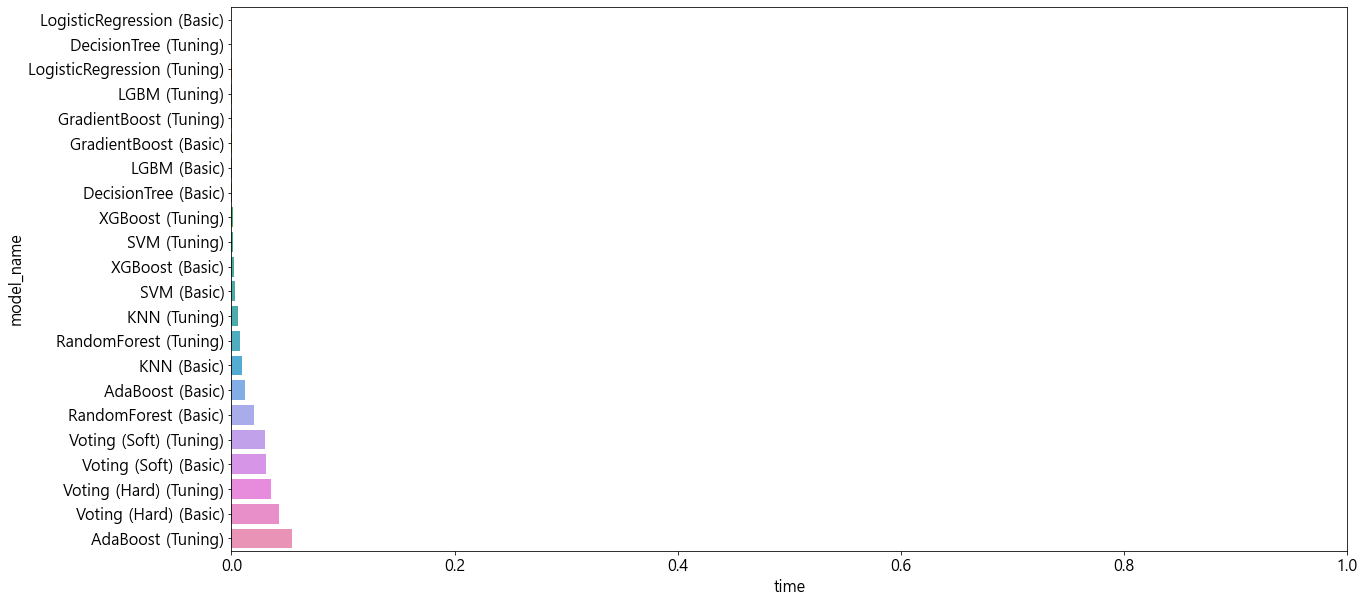

In [33]:
# 시각화
d100 = {
    'time' : time_list,
    'model_name' : model_name_list
}
df100 = pd.DataFrame(d100)
df100.sort_values(by='time', inplace=True)

sns.barplot(data=df100, x='time', y='model_name')
plt.xlim(0,1)
plt.show()

### 최종 모델 선정

In [41]:
len(best_model_list)

22

In [35]:
best_model = best_model_list[19]
best_model

XGBClassifier(base_score=0.5, booster='gblinear', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None, gpu_id=-1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=0,
              num_parallel_tree=None, predictor=None, random_state=1,
              reg_alpha=0, reg_lambda=0, ...)

In [36]:
# 선정된 모델에 전체 데이터를 학습한다.
best_model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gblinear', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None, gpu_id=-1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=0,
              num_parallel_tree=None, predictor=None, random_state=1,
              reg_alpha=0, reg_lambda=0, ...)

In [60]:
# 모델 저장
with open('./01_Model.dat', 'wb') as fp :
    pickle.dump(best_model, fp)
    pickle.dump(encoder1, fp)
    pickle.dump(scaler1, fp)

In [62]:
# 복원한다.
with open('./01_Model.dat','rb') as fp :
    model100 = pickle.load(fp)
    encoder100 = pickle.load(fp)
    scaler100 = pickle.load(fp)
    
print(model100)
print(encoder100)
print(scaler100)

XGBClassifier(base_score=0.5, booster='gblinear', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None, gpu_id=-1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=0,
              num_parallel_tree=None, predictor=None, random_state=1,
              reg_alpha=0, reg_lambda=0, ...)
LabelEncoder()
StandardScaler()


In [63]:
# 예측할 데이터를 불러온다.
df2 = pd.read_csv('./data/breast_cancer_new.csv')
df2

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,12.62,17.15,80.62,492.9,0.08583,0.05430,0.02966,0.02272,0.1799,0.05826,...,14.340,22.15,91.62,633.5,0.12250,0.15170,0.18870,0.09851,0.3270,0.07330
1,13.38,30.72,86.34,557.2,0.09245,0.07426,0.02819,0.03264,0.1375,0.06016,...,15.050,41.61,96.69,705.6,0.11720,0.14210,0.07003,0.07763,0.2196,0.07675
2,11.63,29.29,74.87,415.1,0.09357,0.08574,0.07160,0.02017,0.1799,0.06166,...,13.120,38.81,86.04,527.8,0.14060,0.20310,0.29230,0.06835,0.2884,0.07220
3,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,14.350,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788
4,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.05449,...,14.340,31.88,91.06,628.5,0.12180,0.10930,0.04462,0.05921,0.2306,0.06291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115
111,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
112,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820
113,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.93870,0.26500,0.4087,0.12400


In [64]:
# 표준화
X2 = scaler100.transform(df2)
X2

array([[-0.46250369, -0.45164581, -0.50218195, ..., -0.28043066,
         0.5116929 , -0.5831113 ],
       [-0.24537993,  2.87283471, -0.26498762, ..., -0.59279929,
        -1.15425761, -0.39577673],
       [-0.74533596,  2.52250257, -0.7406203 , ..., -0.7316298 ,
        -0.08705654, -0.64284116],
       ...,
       [ 0.67453917,  2.22606768,  0.64563954, ...,  0.3671957 ,
        -1.12013199, -0.31704191],
       [ 1.81729582,  2.53230207,  1.96430728, ...,  2.21029035,
         1.77899418,  2.16989242],
       [-1.85095302,  1.3588119 , -1.85817047, ..., -1.75415837,
        -0.10722167, -0.74112394]])

In [65]:
# 예측한다.
pred = model100.predict(X2)
pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0])

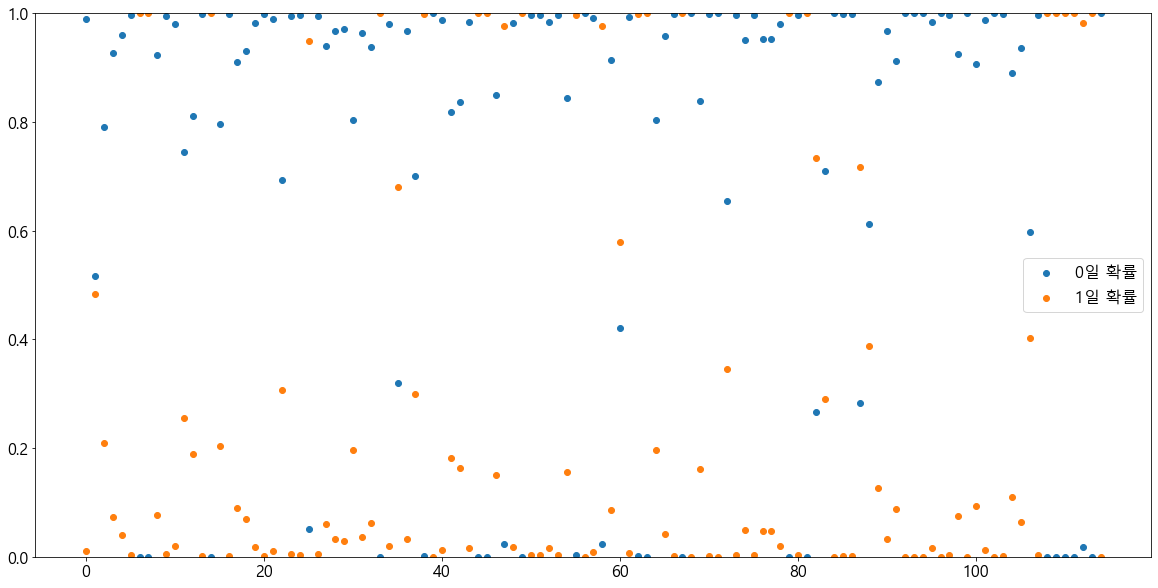

In [66]:
# 확률값을 구해 시각화 해본다.
proba = model100.predict_proba(X2)
a10 = proba[:, 0]
a20 = proba[:, 1]

plt.scatter(list(range(len(a10))), a10, label='0일 확률')
plt.scatter(list(range(len(a20))), a20, label='1일 확률')
plt.legend()
plt.ylim(0, 1)
plt.show()

In [67]:
# 예측된 결과를 문자열로 복원한다.
pred2 = encoder1.inverse_transform(pred)
pred2

array(['benign', 'benign', 'benign', 'benign', 'benign', 'benign',
       'malignant', 'malignant', 'benign', 'benign', 'benign', 'benign',
       'benign', 'benign', 'malignant', 'benign', 'benign', 'benign',
       'benign', 'benign', 'benign', 'benign', 'benign', 'benign',
       'benign', 'malignant', 'benign', 'benign', 'benign', 'benign',
       'benign', 'benign', 'benign', 'malignant', 'benign', 'malignant',
       'benign', 'benign', 'malignant', 'benign', 'benign', 'benign',
       'benign', 'benign', 'malignant', 'malignant', 'benign',
       'malignant', 'benign', 'malignant', 'benign', 'benign', 'benign',
       'benign', 'benign', 'malignant', 'benign', 'benign', 'malignant',
       'benign', 'malignant', 'benign', 'malignant', 'malignant',
       'benign', 'benign', 'benign', 'malignant', 'benign', 'benign',
       'benign', 'benign', 'benign', 'benign', 'benign', 'benign',
       'benign', 'benign', 'benign', 'malignant', 'benign', 'malignant',
       'malignant', 'beni

In [70]:
# 저장한다.
df2['target'] = pred2
df2.to_csv('./data/breast_result.csv')